In [1]:
import sys
sys.path.append("..")

from TwinNeuralNetworkNearestNeighbors import TNNR_NN

import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime

import gc

In [2]:
def_func = lambda a: lambda x: x**3 - a*x

In [3]:
n = 2100
seed = 23497

a = 70

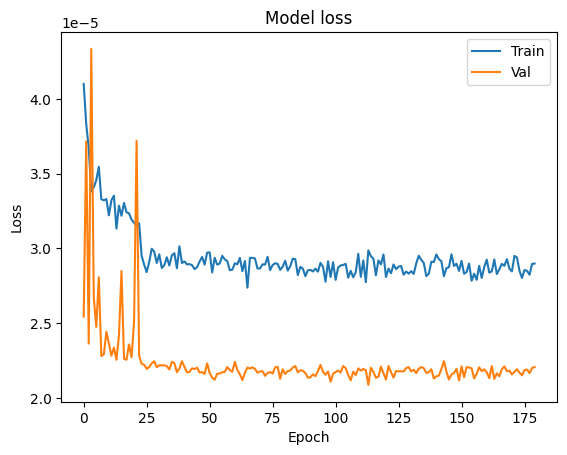

Test RMSE (plain):              6.9577749227931776
Test RMSE (back to y-space):    2.1244640489891333
Test RMSE (min among clusters): 3.4150408928646647
CPU times: user 1h 42min 10s, sys: 1h 41min 27s, total: 3h 23min 38s
Wall time: 21min 37s


In [5]:
%%time

tnnr_nn_test_64_fnorm = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fnorm_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005)

In [6]:
gc.collect()

65278

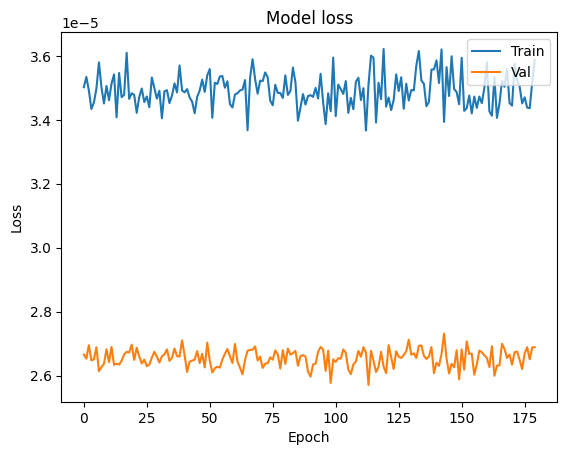

Test RMSE (plain):              6.958363932206171
Test RMSE (back to y-space):    4.994553079885733
Test RMSE (min among clusters): 3.4147214866158584
CPU times: user 1h 46min 8s, sys: 1h 39min 15s, total: 3h 25min 23s
Wall time: 21min 12s


In [7]:
%%time

tnnr_nn_test_64_fzero = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fzero_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                zero_F_training=True)

In [17]:
4.994553079885733-2.1244640489891333

2.8700890308966

In [8]:
gc.collect()

59062

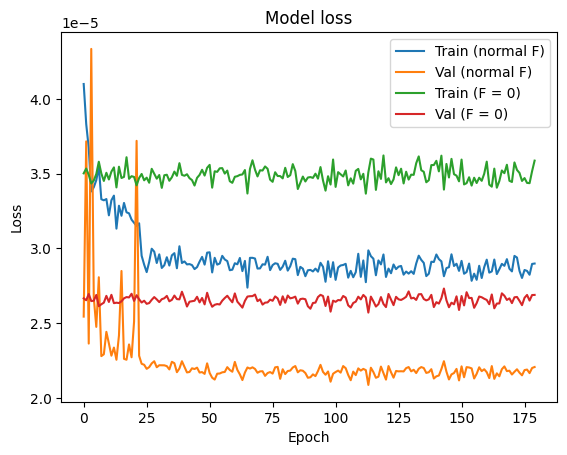

In [9]:
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['loss'], label='Train (normal F)')
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['val_loss'], label='Val (normal F)')

plt.plot(tnnr_nn_test_64_fzero.train_history.history['loss'], label='Train (F = 0)')
plt.plot(tnnr_nn_test_64_fzero.train_history.history['val_loss'], label='Val (F = 0)')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

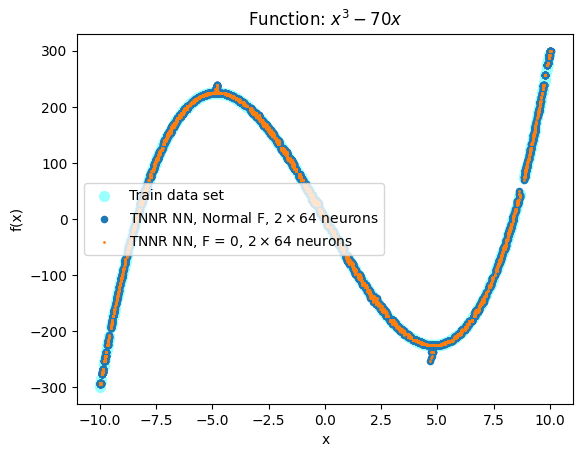

In [20]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single), 
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            label='Train data set', s=50, c='#99ffff')
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, Normal F, $2\\times 64$ neurons', s=20)
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, F = 0, $2\\times 64$ neurons', s=1)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=6)

In [11]:
gc.collect()

2228

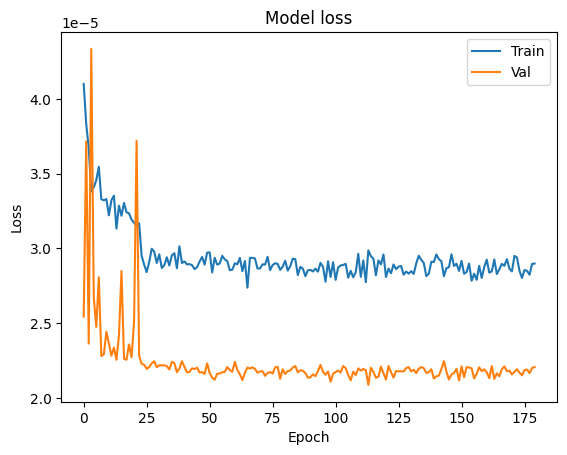

Test RMSE (plain):              5.170652059326769
Test RMSE (back to y-space):    76.02796682273234
CPU times: user 4min, sys: 42.9 s, total: 4min 43s
Wall time: 3min 14s


In [12]:
%%time

tnnr_nn_test_64_no_nn = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_no_nn_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                no_use_nn=True)

In [13]:
gc.collect()

15550

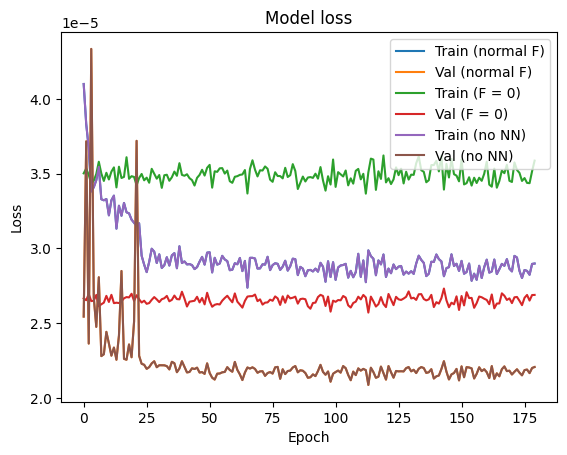

In [14]:
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['loss'], label='Train (normal F)')
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['val_loss'], label='Val (normal F)')

plt.plot(tnnr_nn_test_64_fzero.train_history.history['loss'], label='Train (F = 0)')
plt.plot(tnnr_nn_test_64_fzero.train_history.history['val_loss'], label='Val (F = 0)')

plt.plot(tnnr_nn_test_64_no_nn.train_history.history['loss'], label='Train (no NN)')
plt.plot(tnnr_nn_test_64_no_nn.train_history.history['val_loss'], label='Val (no NN)')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

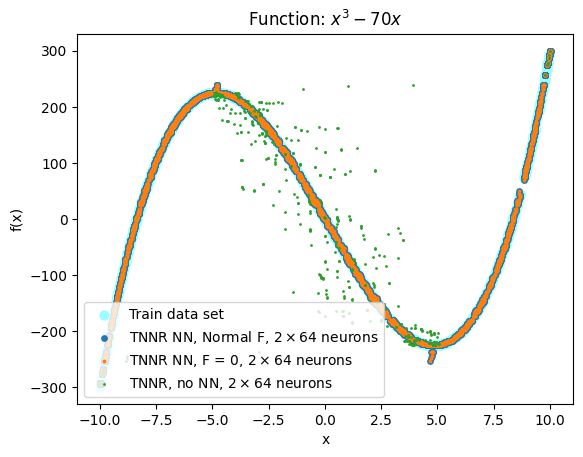

In [15]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single), 
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            label='Train data set', s=40, c='#99ffff')
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, Normal F, $2\\times 64$ neurons', s=15)
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, F = 0, $2\\times 64$ neurons', s=3)
plt.scatter(tnnr_nn_test_64_no_nn.x_pred_test,
            tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn.y_test_single),
            label='TNNR, no NN, $2\\times 64$ neurons', s=1)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [16]:
gc.collect()

1999

------------

## less neighbors

In [1]:
import sys
sys.path.append("..")

from TwinNeuralNetworkNearestNeighbors import TNNR_NN

import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime

import gc

In [2]:
def_func = lambda a: lambda x: x**3 - a*x

In [3]:
n = 2100
seed = 23497

a = 70

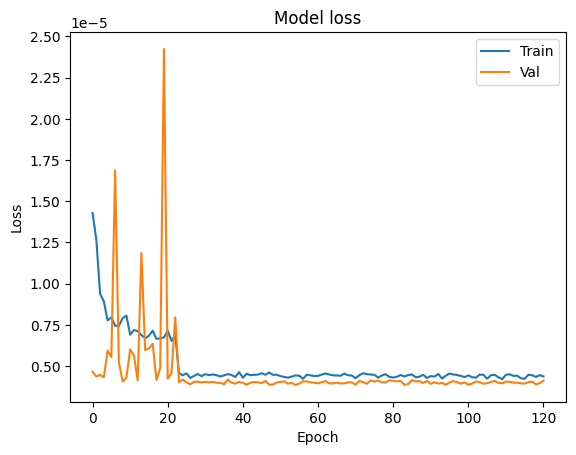

Test RMSE (plain):                                6.898761661147582
Test RMSE (back to y-space):                      0.811152713213288
Test RMSE (min among clusters):                   6.138605359921384
Test RMSE (transformed back):                     6.898761661147582
Test RMSE (min among clusters, transformed back): 6.138605359921384
CPU times: user 9min 4s, sys: 9min 12s, total: 18min 16s
Wall time: 4min 57s


In [5]:
%%time

tnnr_nn_test_64_fnorm = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fnorm_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=5,
                                num_nn_test=2,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005)

In [6]:
gc.collect()

8557

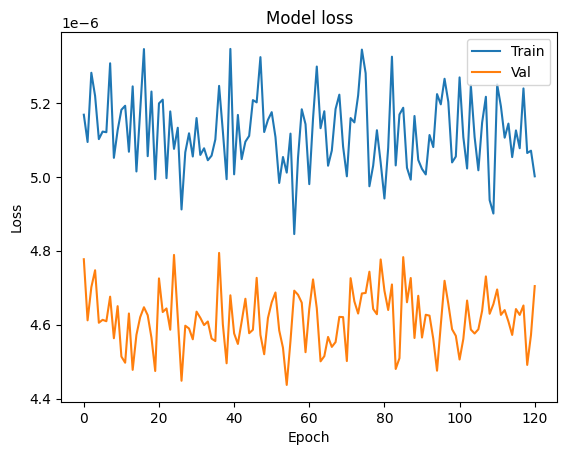

Test RMSE (plain):                                6.8989159829178215
Test RMSE (back to y-space):                      1.6934215207083048
Test RMSE (min among clusters):                   6.136657554583779
Test RMSE (transformed back):                     6.8989159829178215
Test RMSE (min among clusters, transformed back): 6.136657554583779
CPU times: user 16min 36s, sys: 13min 51s, total: 30min 28s
Wall time: 4min 32s


In [7]:
%%time

tnnr_nn_test_64_fzero = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fzero_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=5,
                                num_nn_test=2,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                zero_F_training=True)

In [13]:
0.811152713213288 - 1.6934215207083048

-0.8822688074950168

In [9]:
gc.collect()

3907

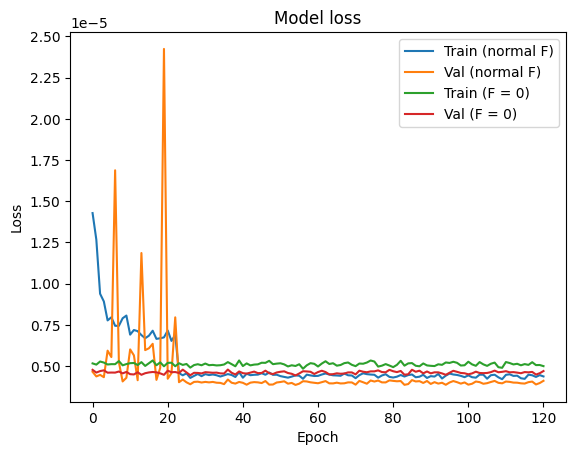

In [10]:
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['loss'], label='Train (normal F)')
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['val_loss'], label='Val (normal F)')

plt.plot(tnnr_nn_test_64_fzero.train_history.history['loss'], label='Train (F = 0)')
plt.plot(tnnr_nn_test_64_fzero.train_history.history['val_loss'], label='Val (F = 0)')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

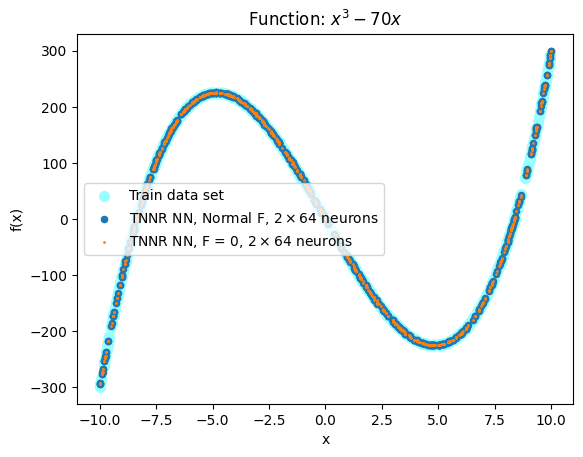

In [11]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single), 
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            label='Train data set', s=50, c='#99ffff')
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, Normal F, $2\\times 64$ neurons', s=20)
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, F = 0, $2\\times 64$ neurons', s=1)

plt.title('Function: $x^3 - 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=6)

In [12]:
gc.collect()

1962

--------------

In [21]:
a = -70

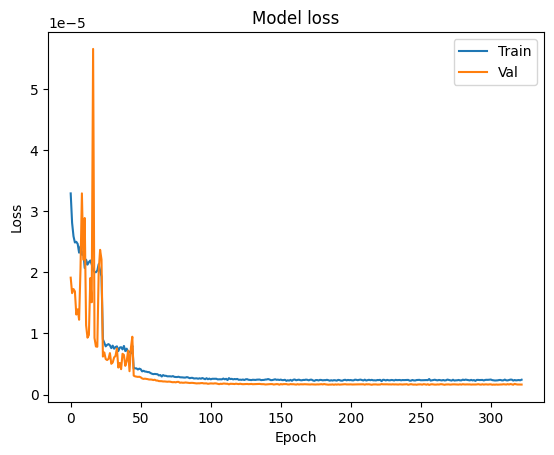

Test RMSE (plain):              0.020377208087160717
Test RMSE (back to y-space):    2.1281749113650124
Test RMSE (min among clusters): 0.002752153181655515
CPU times: user 1h 41min 47s, sys: 1h 41min 30s, total: 3h 23min 18s
Wall time: 24min 19s


In [22]:
%%time

tnnr_nn_test_64_fnorm = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fnorm_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005)

In [23]:
gc.collect()

18670

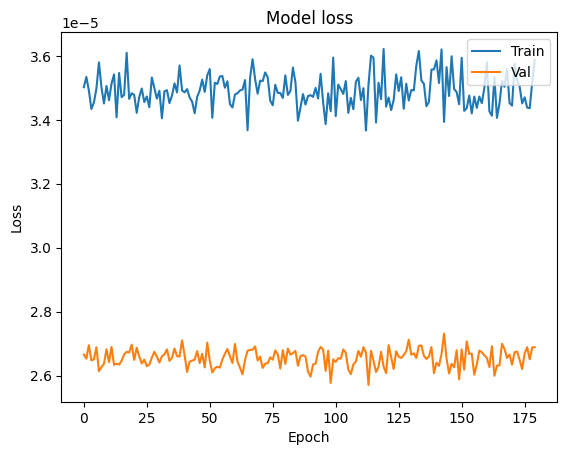

Test RMSE (plain):              0.078955452127092
Test RMSE (back to y-space):    16.101112303328367
Test RMSE (min among clusters): 0.011866236629622754
CPU times: user 1h 34min 37s, sys: 1h 43min 13s, total: 3h 17min 50s
Wall time: 21min 58s


In [24]:
%%time

tnnr_nn_test_64_fzero = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_fzero_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                zero_F_training=True)

In [37]:
2.1281749113650124-16.101112303328367

-13.972937391963356

In [26]:
gc.collect()

26440

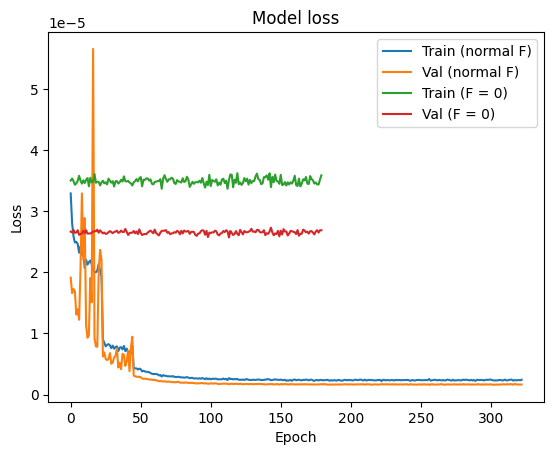

In [27]:
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['loss'], label='Train (normal F)')
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['val_loss'], label='Val (normal F)')

plt.plot(tnnr_nn_test_64_fzero.train_history.history['loss'], label='Train (F = 0)')
plt.plot(tnnr_nn_test_64_fzero.train_history.history['val_loss'], label='Val (F = 0)')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

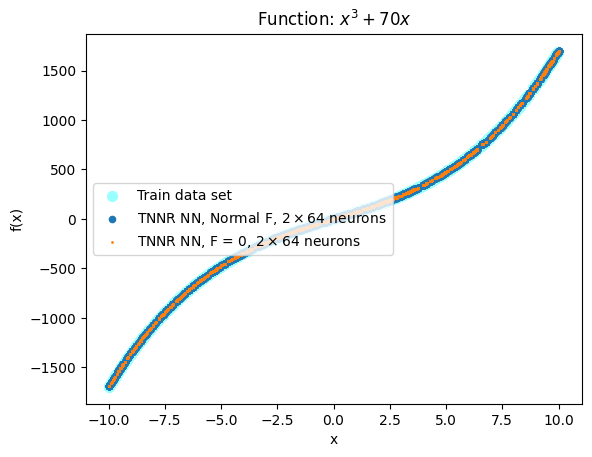

In [35]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single), 
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            label='Train data set', s=50, c='#99ffff')
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, Normal F, $2\\times 64$ neurons', s=20)
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, F = 0, $2\\times 64$ neurons', s=1)

plt.title('Function: $x^3 + 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc=6)

In [29]:
gc.collect()

1433

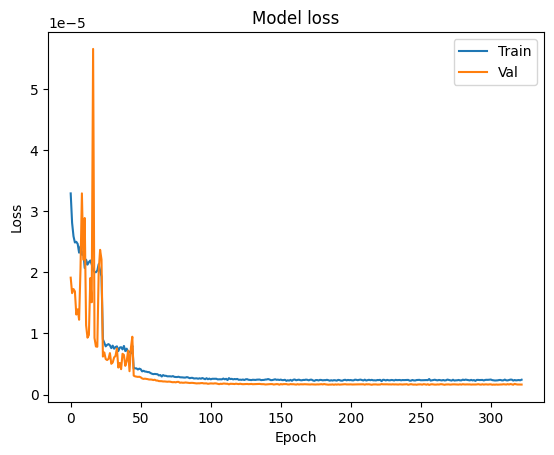

Test RMSE (plain):              0.005916801509278554
Test RMSE (back to y-space):    0.8701807268499395
CPU times: user 6min 58s, sys: 1min 17s, total: 8min 15s
Wall time: 5min 37s


In [30]:
%%time

tnnr_nn_test_64_no_nn = TNNR_NN(def_func(a), n=n, seed=seed, inverse_problem=True, test_pct=0.2, val_pct=0.2,
                                show_summary=False, show_loss_plot=True, show_rmse=True, 
                                mdl_wts_file='weights/tnnr_nn_test_64_no_nn_n' + str(n) + '_inverse_a' + str(a),
                                num_nn_train=13,
                                num_nn_test=15,
                                radius_nn_predict=0.005,
                                radius_sub_nn_predict=0.0005,
                                no_use_nn=True)

In [31]:
gc.collect()

3895

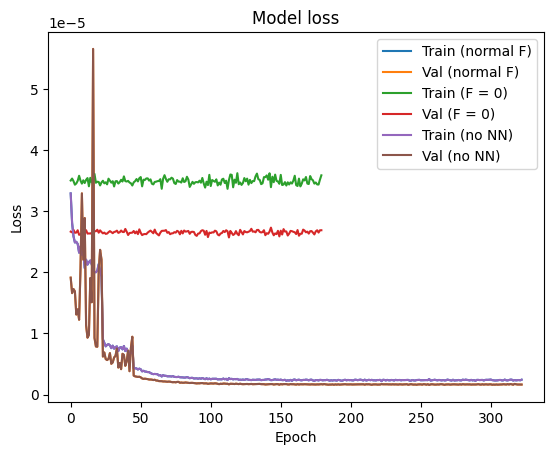

In [32]:
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['loss'], label='Train (normal F)')
plt.plot(tnnr_nn_test_64_fnorm.train_history.history['val_loss'], label='Val (normal F)')

plt.plot(tnnr_nn_test_64_fzero.train_history.history['loss'], label='Train (F = 0)')
plt.plot(tnnr_nn_test_64_fzero.train_history.history['val_loss'], label='Val (F = 0)')

plt.plot(tnnr_nn_test_64_no_nn.train_history.history['loss'], label='Train (no NN)')
plt.plot(tnnr_nn_test_64_no_nn.train_history.history['val_loss'], label='Val (no NN)')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

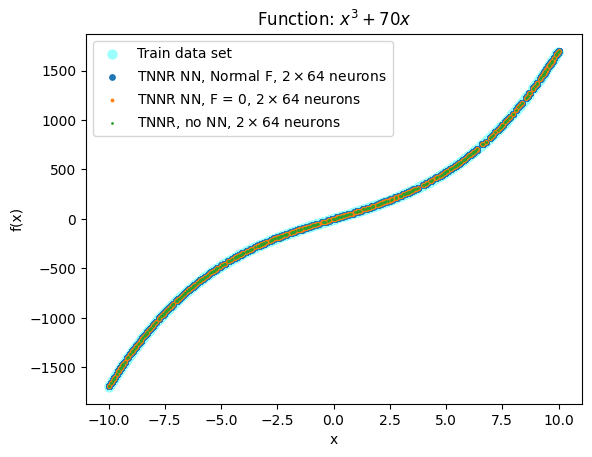

In [36]:
plt.scatter(tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_x(tnnr_nn_test_64_fnorm.x_train_single), 
            tnnr_nn_test_64_fnorm.cn_transformer.inverse_transform_y(tnnr_nn_test_64_fnorm.y_train_single),
            label='Train data set', s=40, c='#99ffff')
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, Normal F, $2\\times 64$ neurons', s=15)
plt.scatter(tnnr_nn_test_64_fnorm.x_pred_test,
            tnnr_nn_test_64_fnorm.y_pred_test,
            label='TNNR NN, F = 0, $2\\times 64$ neurons', s=3)
plt.scatter(tnnr_nn_test_64_no_nn.x_pred_test,
            tnnr_nn_test_64_no_nn.cn_transformer.inverse_transform_y(tnnr_nn_test_64_no_nn.y_test_single),
            label='TNNR, no NN, $2\\times 64$ neurons', s=1)

plt.title('Function: $x^3 + 70x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

In [34]:
gc.collect()

2686